In [81]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math

In [82]:
try:
    import spnspecs
    spnspecs.set_graph_specifications()
except:
    spnspecs = None

In [3]:
figpth = '../Figures'
width = 6.8
dpi = 300

### A common nonlinear function relating viscosity and temperature

The equation that follows is for temperature expressed in $^\circ$C

In [119]:
dtype = np.float
step = 0.01
T0, T1 = 0, 40
T = np.arange(T0, T1, step=step, dtype=dtype)

In [120]:
def nonlin_vsc(T):
    a1 = 2.394e-5
    a2 = 10
    a3 = 248.37
    a4 = 133.15
    visc = np.zeros(T.shape, dtype=np.float)
    for idx, val in enumerate(T):
        mu_T = a1 * a2 ** (a3 / (T[idx] + a4))
        visc[idx] = mu_T
        
    return visc

### A linear approximation for the equation given above

That is, contrive a linear approximation to the nonlinear case above

In [126]:
x_lin_pts = np.array([7.5, 30])
y_lin_pts = nonlin_vsc(x_lin_pts)

# calc rise/run
dviscdT = (y_lin_pts[1] - y_lin_pts[0]) / (x_lin_pts[1] - x_lin_pts[0])

# tempearture of reference viscosity
Tviscref = 20

# reference viscosity
mu_0 = nonlin_vsc(np.array([Tviscref]))

def lin_vsc(T, dviscdT, Tviscref):
    # use the linear formula
    visc_lin = np.zeros(T.shape, dtype=np.float)
    for idx, val in enumerate(T):
        mu_T = dviscdT * (val - Tviscref) + mu_0
        visc_lin[idx] = mu_T
    
    return visc_lin

In [127]:
visc = nonlin_vsc(T)
visc_lin = lin_vsc(T, dviscdT, Tviscref)

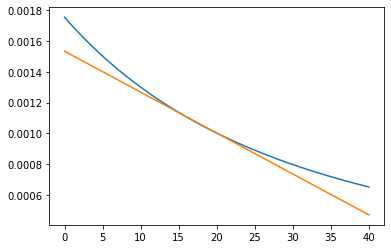

In [128]:
plt.plot(T,visc)
plt.plot(T,visc_lin)

### Plot data

In [124]:
x_increment = 5
x_ticks = np.arange(T0, T1 + x_increment, x_increment)
y_increment = 2e-4
y_ticks = np.arange(math.floor(visc.min() * 10000) / 10000, math.ceil(visc.max() * 10000) / 10000 + y_increment, y_increment)
print(x_ticks)
print(y_ticks)

[ 0  5 10 15 20 25 30 35 40]
[0.0006 0.0008 0.001  0.0012 0.0014 0.0016 0.0018 0.002 ]


AttributeError: 'NoneType' object has no attribute 'add_text'

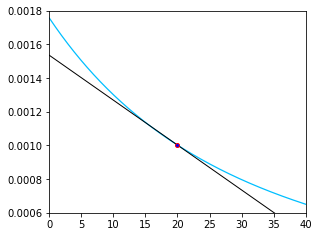

In [154]:
fig, axes = plt.subplots(nrows=1, ncols=1, tight_layout=True, 
                       figsize=(width/1.5, width/2))

if not isinstance(axes, list):
    axes = [axes]

for idx, ax in enumerate(axes):
    ax.set_xlim(T0, T1)
    ax.set_ylim(y_ticks[0], y_ticks[-2])
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_ticks)
    #ax.set_yticks(y_ticks)
    #ax.set_yticklabels(y_ticks, rotation=90, va='center')
    if spnspecs is not None:
        spnspecs.remove_edge_ticks(ax)
        spnspecs.heading(ax, letter=letters[idx])
    

ax = axes[0]
#ax.set_aspect('square', adjustable='box')
#ax.axhline(0, lw=0.5, ls='-.', color='black')
#ax.axvline(0, lw=0.5, ls='-.', color='black')

ax.plot(T, visc, lw=1.25, color='#00BFFF', label=r'$\mu')
ax.plot(T, visc_lin, lw=1., color='black', ls='-', label=r'$\frac {\partial \mu} {\partial T}')
ax.plot([Tviscref], [mu_0], marker="o", markersize=4, markeredgecolor="red", markerfacecolor="blue")
text = r'$\left ( T_0, \mu_0 \right )$'
#ax.text(21, 0.00102, text, style='italic') #fontsize=6)
spnspecs.add_text(ax, text=text, x=0.5, y=0.5, transform=False, bold=False, ha='left', va='top')

if spnspecs is not None:
    handles, labels = ax.get_legend_handles_labels()
    spnspecs.graph_legend(ax, handles=handles[::-1], labels=labels[::-1],
                          loc='upper right', bbox_to_anchor=(1.00,0.95),
                          handlelength=1.5)
ax.set_xlabel(r'Temperature, in $^\circ$C')
ax.set_ylabel(r'$\mu$, in $\frac{kg}{m \cdot s}$')

fpth = os.path.join(figpth, 'VSCnonlinear.pdf')
fig.savefig(fpth, dpi=dpi)